# Multiple Linear Regression 

In [1]:
from sklearn.datasets import fetch_california_housing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
california = fetch_california_housing()

In [5]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [9]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [10]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [11]:
california.target_names

['MedHouseVal']

In [12]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

# Prepare the dataset

In [15]:
dataset = pd.DataFrame(california.data,columns = california.feature_names)

In [16]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
dataset['Price'] = california.target

In [19]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [22]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [24]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

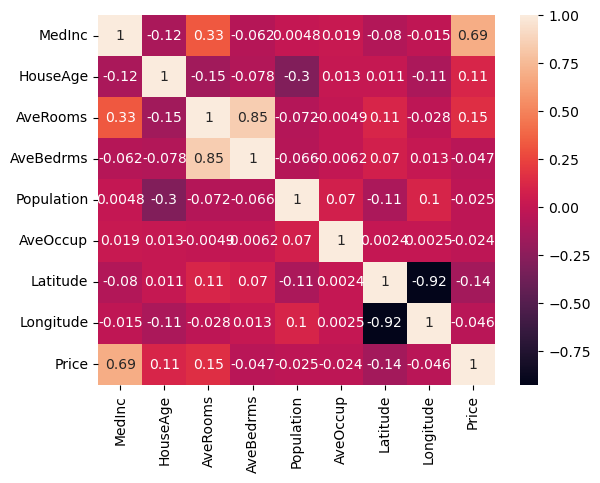

In [25]:
sns.heatmap(dataset.corr(), annot=True)

# Independent and Dependent features

In [29]:
X = dataset.iloc[:,:-1]  #Independent feature
y = dataset.iloc[:,-1]  #dependent feature

In [30]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [31]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_
test = train_test_split(X,y,test_size=0.35, random_state=10)

In [35]:
X_train.shape , y_train.shape ,X_test.shape , y_test.shape

((13416, 8), (13416,), (7224, 8), (7224,))

In [36]:
X_train , X_test

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 14654  3.9417      33.0  6.194896   1.009281      1256.0  2.914153     32.80   
 19837  2.2500      19.0  4.436709   1.025316      1327.0  4.199367     36.52   
 9220   2.9861      17.0  5.376414   1.014540      1580.0  2.552504     37.12   
 19161  4.3278       8.0  5.843046   1.038073      3833.0  2.978244     38.36   
 2412   3.7917      24.0  5.358025   0.954733       693.0  2.851852     36.61   
 ...       ...       ...       ...        ...         ...       ...       ...   
 9372   4.1250      37.0  5.109792   1.044510       648.0  1.922849     37.93   
 7291   1.2059      18.0  2.537037   1.089744      1913.0  2.725071     33.98   
 17728  5.5336       6.0  4.905336   0.965577      2160.0  3.717728     37.32   
 7293   2.2059      35.0  2.748491   0.997988      2160.0  4.346076     33.98   
 17673  2.6763      16.0  3.953010   1.099853      1674.0  2.458150     37.30   
 
        Longitude  
 14654

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled

array([[ 0.04283299,  0.3496617 ,  0.31593461, ..., -0.01880775,
        -1.32121665,  1.20954992],
       [-0.85484869, -0.75922391, -0.40377882, ...,  0.16184913,
         0.41470662,  0.1436054 ],
       [-0.46424546, -0.91763614, -0.01911086, ..., -0.06964317,
         0.69469425, -0.34951847],
       ...,
       [ 0.88755692, -1.78890341, -0.21194654, ...,  0.09414725,
         0.78802346, -1.10663794],
       [-0.87824986,  0.50807393, -1.09485052, ...,  0.18247142,
        -0.77057432,  0.66661556],
       [-0.62863737, -0.99684226, -0.60178075, ..., -0.08290613,
         0.77869054, -1.15146739]])

In [39]:
X_test_scaled

array([[ 0.75208483, -1.31366672, -0.39178055, ...,  0.12427197,
        -0.68657803,  0.19341589],
       [ 0.05901747, -0.12557499, -0.32904686, ..., -0.11840026,
         0.89535205, -1.3656525 ],
       [ 0.34407665, -1.31366672, -0.40800679, ..., -0.15348652,
        -0.91523459,  0.89574383],
       ...,
       [-1.57513782, -1.47207895,  0.23615413, ...,  0.02160874,
        -0.69591095,  1.05015635],
       [-1.18649795,  0.03283724,  0.50223152, ...,  0.04948561,
        -0.78924016,  1.00034586],
       [ 0.14009908, -0.83843003,  0.06578889, ...,  0.00666592,
        -0.30859474, -0.42423421]])

# Model Training

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
regression = LinearRegression()

In [42]:
regression

LinearRegression()

In [43]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [45]:
#8 slope
regression.coef_

array([ 0.82705231,  0.12569943, -0.26765974,  0.3270867 ,  0.00306239,
       -0.02824658, -0.92621319, -0.891201  ])

In [46]:
#Intercept
regression.intercept_

2.064574772659516

# Prediction for test data

In [47]:
y_pred_test = regression.predict(X_test_scaled)

In [50]:
y_pred_test

array([2.99687587, 2.57737059, 2.34441618, ..., 0.22156425, 0.7525121 ,
       2.65649754])

# Performance Metrcis 

In [55]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


0.5469498414975184
0.5349541499835841
0.7395605732443545


# Accuracy of the model R squared and Adjusted R squared

## R square
Formula

**R^2 = 1 - SSR/SST**


- R^2	=	Accuracy of the model
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [57]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)
print(score)

0.5962422403259873


## Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [58]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5957945532743737

# Picking

Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [59]:
import pickle

In [60]:
pickle.dump(scaler,open('scaler1.pkl','wb'))
pickle.dump(regression,open('regression1.pkl','wb'))


In [62]:
model_regressor = pickle.load(open('regression1.pkl','rb'))

In [65]:
model_regressor.predict(X_test_scaled)

array([2.99687587, 2.57737059, 2.34441618, ..., 0.22156425, 0.7525121 ,
       2.65649754])

In [66]:
standard_scaler = pickle.load(open('scaler1.pkl','rb'))

In [67]:
model_regressor.predict(standard_scaler.transform(X_test))

array([2.99687587, 2.57737059, 2.34441618, ..., 0.22156425, 0.7525121 ,
       2.65649754])